In [1]:
##importing libraries  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import data
df = pd.read_excel(r'/Users/shirwetelfeel/Desktop/Data analysis /tasks/Data immersion/Achievment 6/Raw data/Furniture Superstore copy.xlsx')
print(df)


                      Order ID Order Date            Ship Date  \
0      AE-2018-EB4110138-41926 2018-10-14  2018-10-14 00:00:00   
1      IN-2017-TS2134092-41219 2017-11-06  2017-11-08 00:00:00   
2      IN-2017-MB1808592-41378 2017-04-14  2017-04-18 00:00:00   
3        AG-2018-CL25653-42164 2018-06-09  2018-06-13 00:00:00   
4     CA-2017-AB10015140-40974 2017-03-06  2017-03-07 00:00:00   
...                        ...        ...                  ...   
7461  ES-2017-BC11125120-41010 2017-04-11  2017-04-15 00:00:00   
7462  ZA-2018-TA11385146-41692 2018-02-22  2018-02-27 00:00:00   
7463  ZA-2018-TA11385146-41692 2018-02-22  2018-02-27 00:00:00   
7464  CA-2017-JA15970140-41224 2017-11-11  2017-11-15 00:00:00   
7465  ZA-2018-TS11205146-42062 2018-02-27  2018-03-03 00:00:00   

           Ship Mode   Customer ID   Customer Name      Segment  \
0           Same Day    EB-4110138  Eugene Barchas     Consumer   
1        First Class    TS-2134092   Toby Swindell     Consumer   
2     

In [4]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Market', 'Product ID', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'IsFirstShopping', 'Rating', 'Customer Referrals', 'Complaint'],
      dtype='object')

In [6]:
# Check for missing values

df.isnull().sum()
#no missing data

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
IsFirstShopping       0
Rating                0
Customer Referrals    0
Complaint             0
dtype: int64

/Users/shirwetelfeel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

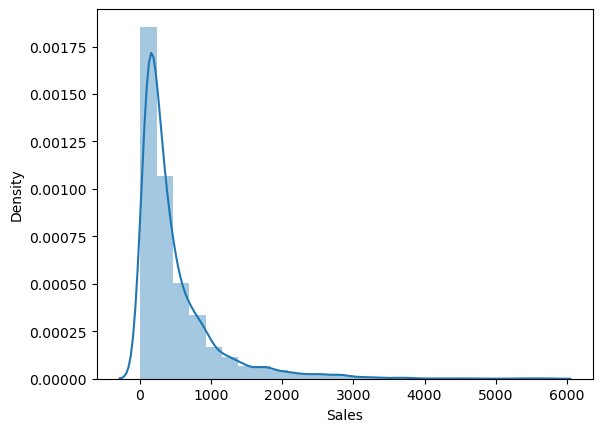

In [8]:
# to show extreme values
sns.distplot(df['Sales'], bins=25) # Shows extreme values

In [9]:
df['Sales'].mean() # Check the mean

484.83161782748374

In [10]:
df['Sales'].median() # Check the median

286.77

In [11]:
df['Sales'].max() # Check the max

5759.963999999998

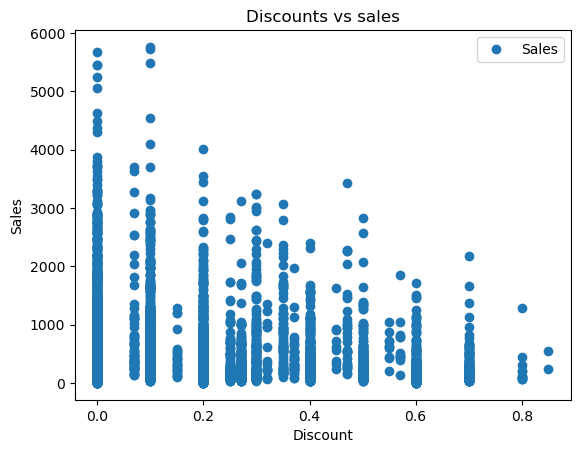

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Discount', y='Sales',style='o')
plt.title('Discounts vs sales')  
plt.xlabel('Discount')  
plt.ylabel('Sales')  
plt.show()

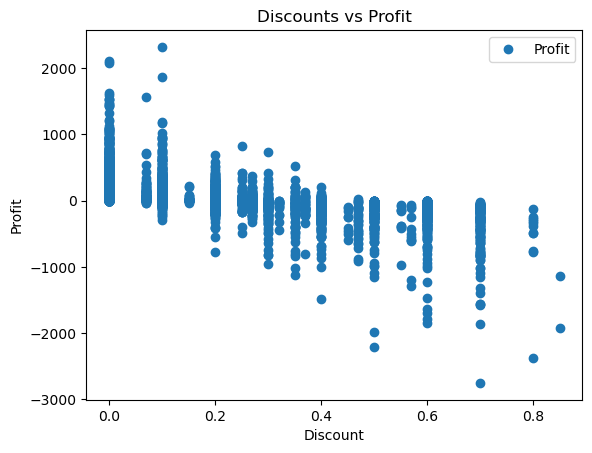

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Discount', y='Profit',style='o')
plt.title('Discounts vs Profit')  
plt.xlabel('Discount')  
plt.ylabel('Profit')  
plt.show()

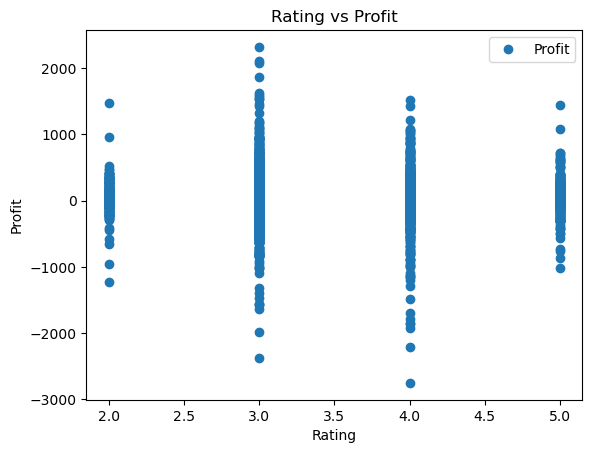

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Rating', y='Profit',style='o')
plt.title('Rating vs Profit')  
plt.xlabel('Rating')  
plt.ylabel('Profit')  
plt.show()

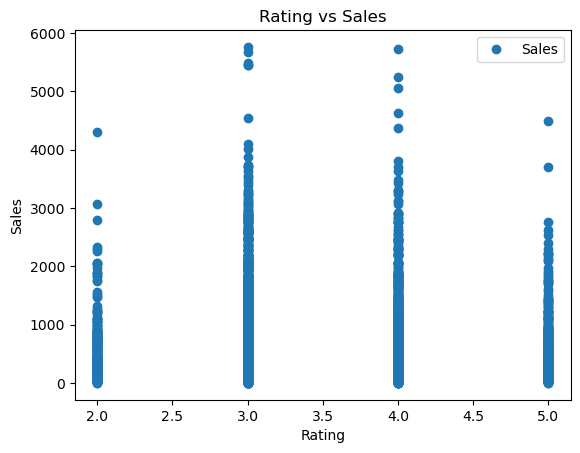

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Rating', y='Sales',style='o')
plt.title('Rating vs Sales')  
plt.xlabel('Rating')  
plt.ylabel('Sales')  
plt.show()

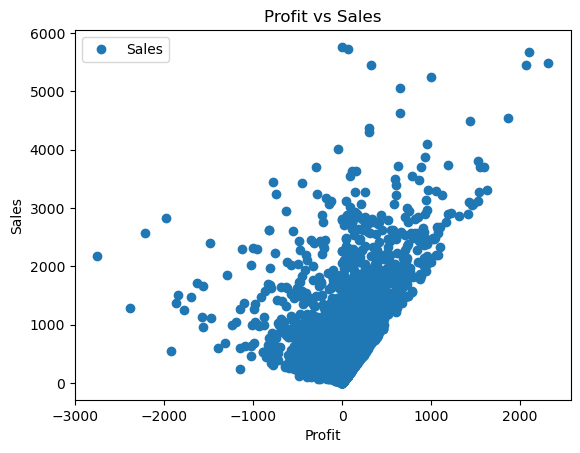

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Profit', y='Sales',style='o')
plt.title('Profit vs Sales')  
plt.xlabel('Profit')  
plt.ylabel('Sales')  
plt.show()

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Sales'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [25]:
X

array([[ 224.748],
       [1822.08 ],
       [5244.84 ],
       ...,
       [ 249.72 ],
       [ 629.22 ],
       [ 337.92 ]])

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

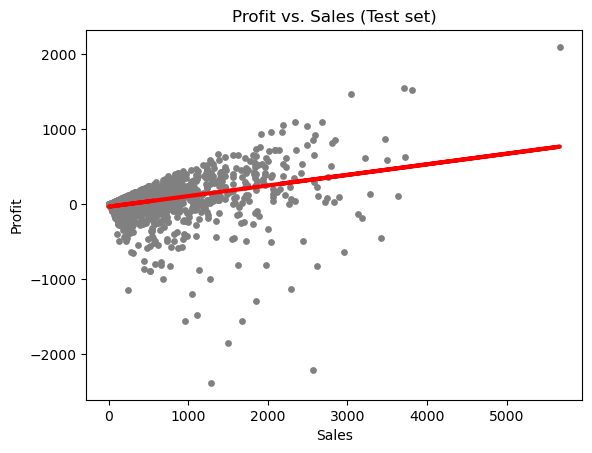

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Profit vs. Sales (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.1411786]]
Mean squared error:  44934.02302315503
R2 score:  0.11745453413189288


In [33]:
y_predicted

array([[ 45.62706134],
       [-22.54187253],
       [213.94865845],
       ...,
       [-26.67897022],
       [-19.16166156],
       [275.8611215 ]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-338.9400,45.627061
1,-36.6960,-22.541873
2,261.2400,213.948658
3,-68.8290,-25.883994
4,177.7200,54.563667
5,-140.7240,24.794182
6,9.1650,-26.410025
7,204.9000,27.105841
8,22.6800,0.080022
9,96.7800,-0.885640


In [35]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.1411786]]
Mean squared error:  45642.66814387054
R2 score:  0.130723196318981


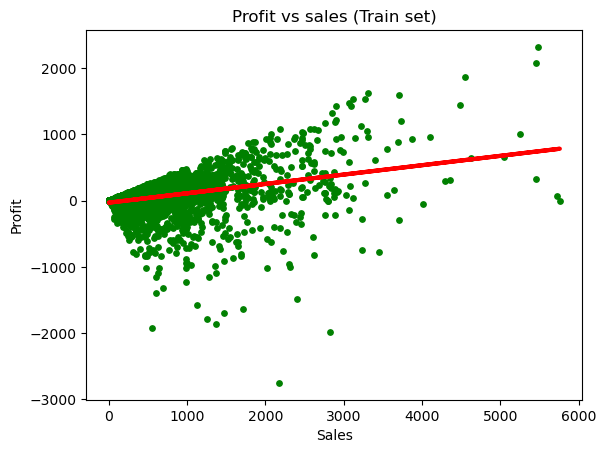

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Profit vs sales (Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [38]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Sales'] <=5000]

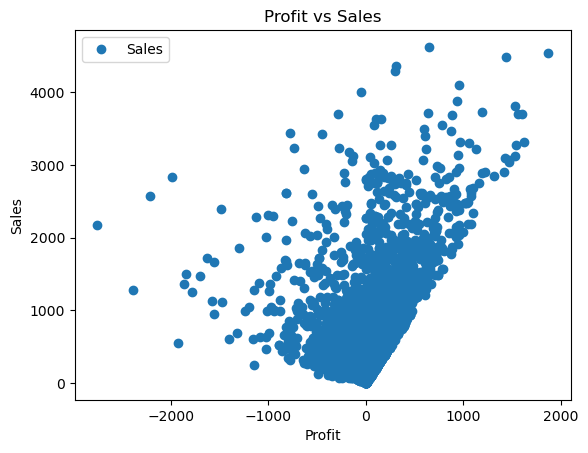

In [39]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Profit', y='Sales', style='o')  
plt.title('Profit vs Sales')  
plt.xlabel('Profit')  
plt.ylabel('Sales')   
plt.show()


In [41]:
# Reshape again.

X_2 = df_test['Sales'].values.reshape(-1,1)
y_2 = df_test['Profit'].values.reshape(-1,1)

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [44]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [45]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [46]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13711298]]
Mean squared error:  47518.20560231546
R2 score:  0.09873159231229522


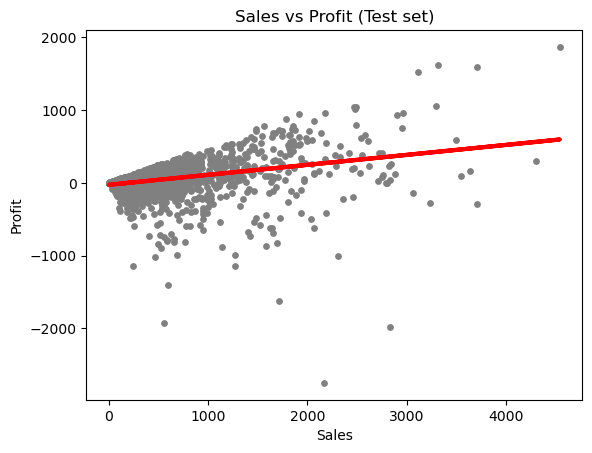

In [48]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [49]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,-44.6200,6.114411
1,6.4400,-9.524695
2,7.5600,-20.277095
3,-10.4370,61.838909
4,436.7700,165.968951
5,39.6080,6.200518
6,104.2960,29.977006
7,148.1380,92.251528
8,156.9180,69.594705
9,6.2608,-25.232359


In [51]:
##summary
# positive slope indicates a positive relationship (as X rises, so does y)
#the regression line isn’t an accurate representation of the data
#The R2 score for your model is 0.0987. You can think of this as a percentage out of one hundred, or 9.8 percent.
#Since 9.8 percent out of one hundred isn’t that great, well, isn’t that great of a fit either.
#After looking at both of these, it’s pretty clear that my model isn’t performing too well.